# **Fraud Analytics**

---

**Objective**


Build and compare several different classification models using toll transaction data. This is useful for identifying whether a toll transaction is fraud or not based on the features provided. Besides that it can also help improve security and supervision in the toll transaction system and reduce losses due to fraud.


---

**Outline**

- Business Understanding
- Importing Data
- Splitting Data
- Pre-Processing
- Modeling
- Prediction

## **1. Business Understanding**

In the toll transaction industry, fraud can be a serious problem that can result in large financial losses for toll road operators and users. Some examples of factors that cause fraud in toll transactions include:

1. Stolen or misused Fastags can be used to perform toll transactions without the owner's authorization. This can happen if the Fastag is stolen or lost, and then used by an unauthorized party to perform toll transactions.
2. Data manipulation by internal or external parties, such as toll officers or other parties who have access to the toll transaction system, can also be a cause of fraud. This could include altering transaction data or entering fraudulent transactions into the system.
3. Identity theft of toll road users can also be a cause of fraud. Unauthorized parties can use fake identities or steal users' personal information to conduct toll transactions without authorization.
5. Some transactions that look suspicious or unusual, such as transactions with unreasonable amounts or unusual transaction patterns. Transactions like this can be an indicator of fraud and need to be followed up further.

By building a classification model that can identify suspicious or fraudulent transactions, toll road operators can take appropriate preventive measures to reduce risks and losses due to fraud activities.

### **1.2 Data Description**

- Dataset from [Fastag Fraud Detection-Kaggle](https://www.kaggle.com/datasets/thegoanpanda/fastag-fraud-detection-datesets-fictitious/data)
- These attributes capture key details about toll transactions, including :
    1. Vehicle Information (Type, Dimensions, Plate Number)
    2. Payment Details (FastagID, Transaction Amount, Amount Paid)
    3. Toll Location and Timing (TollBoothID, Timestamp)
    4. Lane Usage (Lane Type)
    5. Vehicle Speed
    6. Fraud indicator

### **1.3 Define the Problem**

- There are two problems:
    1. If it is wrong to predict fraud as not fraud, it can result in financial losses for toll road operators. Transactions that should be rejected because they are suspicious will still be processed normally which can cause money losses.
    2. If it is wrong to predict not fraud as fraud, it can damage the reputation of toll road organizers. Toll road users who are victims of fraud may lose confidence in the toll transaction system and choose to use a more secure and reliable toll service.

    Therefore, a model is made to classify between fraud and not fraud.

- Model description:
    1. Model inputs are toll transaction features such as Vehicle_Type, TollBoothID, Lane_Type, Vehicle_Dimensions, Transaction_Amount, Amount_paid, and Geographical_Location.
    2. The output of the model is a prediction of whether the transaction is fraud or non-fraud.

- If a transaction is flagged as suspicious, the decision maker can do the following:
    1. Perform additional checks to verify its authenticity.
    2. If highly suspicious, delay or reject the transaction.
    3. Issue a warning to the relevant party.
    4. Report to the appropriate authorities for further investigation.

### **1.4 Task**

- **Task:**
  - Fraudulent Fastag Transaction Classification

- **Technique used:**
  - Baseline: all transaction is not fraudulent
  - Logistic Regression
  - Decision Tree
  - KNN
  - Support Vector Machine
  - Random Forest

- **Evaluation:**
  - ROC - AUC

## **2. Importing Data**

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
def read_data(data_path):   
    #read the CSV file into a pandas DataFrame
    data = pd.read_csv(data_path)

    #print the shape of the DataFrame (number of rows and columns)
    print("Data shape       :", data.shape)

    #return the DataFrame containing the data
    return data

In [3]:
#path to the CSV file containing Fastag fraud detection data
path = 'FastagFraudDetection.csv'

#call the read_data function with the provided data path
#the function reads the CSV file and returns a DataFrame
fraud = read_data(data_path=path)

#display the first few rows of the DataFrame to inspect the data
fraud.head()

Data shape       : (5000, 13)


,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
0,1,1/6/2023 11:20,Bus,FTG-001-ABC-121,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,KA11AB1234,Fraud
1,2,1/7/2023 14:55,Car,FTG-002-XYZ-451,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,KA66CD5678,Fraud
2,3,1/8/2023 18:25,Motorcycle,NaN,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,KA88EF9012,Not Fraud
3,4,1/9/2023 2:05,Truck,FTG-044-LMN-322,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,KA11GH3456,Fraud
4,5,1/10/2023 6:35,Van,FTG-505-DEF-652,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,KA44IJ6789,Fraud


In [4]:
#display concise summary information about the DataFrame 'fraud'
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


### **2.1 Checks for Nunique and Unique Values in Each Column**

In [5]:
#calculate the number of unique values (cardinality) in each column of the DataFrame 'fraud'
cardinality = fraud.nunique().sort_values(ascending=False)
#onvert the Series to a DataFrame with column name 'Cardinality'
cardinality.to_frame(name='Cardinality')

,Cardinality
Transaction_ID,5000
Vehicle_Plate_Number,5000
FastagID,4451
Timestamp,4423
Vehicle_Speed,85
Amount_paid,23
Transaction_Amount,20
Vehicle_Type,7
TollBoothID,6
Geographical_Location,5


In [6]:
fraud['Vehicle_Speed'].unique()

array([ 65,  78,  53,  92,  60, 105,  70,  88,  45,  72,  58,  81,  67,
        98,  50,  75,  62,  84,  55,  80,  68,  90,  48,  77,  63,  87,
        52,  95,  73,  82,  57,  96,  66,  89,  51,  76,  61,  85,  74,
        93,  49,  83,  59,  91,  71,  86,  56,  79,  64,  97,  69,  94,
        54,  44,  47,  46,  40,  41,  42,  43,  38,  39,  37,  20,  21,
        22,  23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,
        35,  36,  10,  99, 111, 118, 102], dtype=int64)

In [7]:
fraud['Amount_paid'].unique()

array([120, 100,   0, 160,  90, 180, 350, 140, 110,  60, 290, 130,  70,
       190, 150, 340,  80, 300,  50, 115, 145, 330, 125], dtype=int64)

In [8]:
fraud['Transaction_Amount'].unique()

array([350, 120,   0, 140, 160, 180, 290, 110, 100, 130,  60, 150, 340,
       300,  70, 115, 145, 330,  90, 125], dtype=int64)

In [9]:
fraud['Vehicle_Type'].unique()

array(['Bus ', 'Car', 'Motorcycle', 'Truck', 'Van', 'Sedan', 'SUV'],
      dtype=object)

In [10]:
fraud['TollBoothID'].unique()

array(['A-101', 'B-102', 'D-104', 'C-103', 'D-105', 'D-106'], dtype=object)

In [11]:
fraud['Geographical_Location'].unique()

array(['13.059816123454882, 77.77068662374292',
       '13.042660878688794, 77.47580097259879',
       '12.84197701525119, 77.67547528176169',
       '12.936687032945434, 77.53113977439017',
       '13.21331620748757, 77.55413526894684'], dtype=object)

In [12]:
fraud['Vehicle_Dimensions'].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [13]:
fraud['Lane_Type'].unique()

array(['Express', 'Regular'], dtype=object)

## **3. Splitting Data**

### **3.1 Split Input & Output**

In [14]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [15]:
#define the columns to be used as features for classification
column =  ["Vehicle_Type", "TollBoothID", "Lane_Type", "Vehicle_Dimensions", "Transaction_Amount",
            "Amount_paid",   "Geographical_Location", "Vehicle_Speed", "Fraud_indicator"]

In [16]:
#copy the specified columns from the 'fraud' DataFrame into a new DataFrame named 'data'
data = fraud[column].copy()

#display concise summary information about the new DataFrame 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Vehicle_Type           5000 non-null   object
 1   TollBoothID            5000 non-null   object
 2   Lane_Type              5000 non-null   object
 3   Vehicle_Dimensions     5000 non-null   object
 4   Transaction_Amount     5000 non-null   int64 
 5   Amount_paid            5000 non-null   int64 
 6   Geographical_Location  5000 non-null   object
 7   Vehicle_Speed          5000 non-null   int64 
 8   Fraud_indicator        5000 non-null   object
dtypes: int64(3), object(6)
memory usage: 351.7+ KB


In [17]:
#function split input and output
def split_input_output(data, target_column):
    """
    Split the input features and the output target column from the dataset.

    Parameters:
    - data: DataFrame
        The dataset containing both input features and the target column.
    - target_column: str
        The name of the target column to be separated.

    Returns:
    - X: DataFrame
        The input features (all columns except the target column).
    - y: Series
        The output target column.

    """

    #separate input features (X) and output target column (y)
    X = data.drop(columns = target_column)
    y = data[target_column]

    #print validation information
    print('X shape:', X.shape)
    print('y shape :', y.shape)

    return X, y

In [18]:
#call the split_input_output function to separate input features (X) and the target column (y)
X, y = split_input_output(data = data,
                          target_column = "Fraud_indicator")

#display the first few rows of the input features (X)
X.head()

X shape: (5000, 8)
y shape : (5000,)


,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed
0,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65
1,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78
2,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53
3,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92
4,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60


In [19]:
#display the first few rows of the target column (y)
y.head()

0        Fraud
1        Fraud
2    Not Fraud
3        Fraud
4        Fraud
Name: Fraud_indicator, dtype: object

### **3.2 Validate the Data Dimension**

Validate whether the data dimensions are in accordance with the data standards in the data definition process.

In [20]:
#get the number of samples (rows) and features (columns) in the input features (X)
n_samples, n_features = X.shape

#print the number of samples and features
print(f"Number of samples  : {n_samples}")
print(f"Number of features : {n_features}")

Number of samples  : 5000
Number of features : 8


In [21]:
#get the names of the features (columns) in the input features (X)
features_names = X.columns

#print the names of the features
print(f"name of features : {features_names}")

name of features : Index(['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions',
       'Transaction_Amount', 'Amount_paid', 'Geographical_Location',
       'Vehicle_Speed'],
      dtype='object')


### **3.3 Split Train, Valid and Test**

In [22]:
def split_train_valid_test(X, y, test_size, valid_size, stratify, random_state=42):
    """
    Split the dataset into training, validation, and test sets.

    Parameters:
    - X: Input features.
    - y: Target variable.
    - test_size: Proportion of the dataset to include in the test split.
    - valid_size: Proportion of the dataset to include in the validation split.
    - stratify: Array-like or None (default=None). If not None, data is split in a stratified fashion.
    - random_state: Controls the randomness of the split.

    Returns:
    - X_train, X_valid, X_test: Training, validation, and test sets of input features.
    - y_train, y_valid, y_test: Training, validation, and test sets of target variable.
    """

    #split the dataset into train and not train (validation + test)
    X_train, X_not_train, y_train, y_not_train = train_test_split(
        X,
        y,
        test_size = test_size + valid_size,
        stratify = stratify,
        random_state = random_state
    )

    #split the not train set into validation and test sets
    X_valid, X_test, y_valid, y_test = train_test_split(
        X_not_train,
        y_not_train,
        test_size = valid_size/(test_size + valid_size),
        stratify = y_not_train,
        random_state = random_state
    )

    #print the shapes of the resulting datasets
    print('X train shape:', X_train.shape)
    print('y train shape:', y_train.shape)
    print('X valid shape :', X_valid.shape)
    print('y valid shape :', y_valid.shape)
    print('X test shape :', X_test.shape)
    print('y test shape :', y_test.shape)

    return X_train, X_valid, X_test, y_train, y_valid, y_test


In [23]:
#split the dataset into training, validation, and test sets using a 60-20-20 ratio
#the stratify parameter ensures that the class distribution is preserved in the splits
splitted_data = split_train_valid_test(
    X = X,
    y = y,
    test_size = 0.2,
    valid_size = 0.2,
    stratify = y,
    random_state = 42
)

#unpack the returned data into separate variables for convenience
X_train, X_valid, X_test, y_train, y_valid, y_test = splitted_data

X train shape: (3000, 8)
y train shape: (3000,)
X valid shape : (1000, 8)
y valid shape : (1000,)
X test shape : (1000, 8)
y test shape : (1000,)


**Summary**
  - `train_size` = 60% from original data
  - `validation_size` = 20% from original data
  - `test_size` = 20% from original data,

## **4. Exploratory Data Analysis**

In [24]:
#print the shapes of the training set features and target variable
print('X train shape:', X_train.shape)  #displays the shape of the training set features
print('y train shape:', y_train.shape)  #displays the shape of the training set target variable


X train shape: (3000, 8)
y train shape: (3000,)


In [25]:
#concatenate the training set features and target variable along the columns (axis=1)
eda_df = pd.concat([X_train, y_train],
                   axis=1)
eda_df.head()

,Vehicle_Type,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Fraud_indicator
4652,Truck,C-103,Express,Large,330,330,"13.21331620748757, 77.55413526894684",64,Not Fraud
850,Truck,C-103,Express,Large,290,290,"13.042660878688794, 77.47580097259879",87,Not Fraud
3589,Van,B-102,Regular,Medium,130,130,"12.84197701525119, 77.67547528176169",92,Not Fraud
4567,Motorcycle,D-106,Regular,Small,0,0,"13.21331620748757, 77.55413526894684",97,Not Fraud
1459,Truck,C-103,Regular,Large,340,340,"12.84197701525119, 77.67547528176169",91,Not Fraud


In [26]:
#print train set shape after concat
print('eda_df shape:', eda_df.shape)

eda_df shape: (3000, 9)


### **4.1 Check for Statistic Descriptives**

In [27]:
#display descriptive statistics of the concatenated DataFrame
eda_df.describe()

,Transaction_Amount,Amount_paid,Vehicle_Speed
count,3000.000000,3000.000000,3000.000000
mean,161.358333,141.173333,67.904000
std,113.033279,107.002912,16.561548
min,0.000000,0.000000,10.000000
25%,100.000000,90.000000,55.000000
50%,130.000000,120.000000,67.000000
75%,290.000000,160.000000,82.000000
max,350.000000,350.000000,118.000000


**Summary**

- `Transaction_Amount` varies from 0 to 350
- `Amount_paid` varies from 0 to 350
- `Vehicle_Speed` varies from 10 to 118

### **4.2 Check for Missing Values**

In [28]:
#check for missing values in the concatenated DataFrame
eda_df.isna().sum()

Vehicle_Type             0
TollBoothID              0
Lane_Type                0
Vehicle_Dimensions       0
Transaction_Amount       0
Amount_paid              0
Geographical_Location    0
Vehicle_Speed            0
Fraud_indicator          0
dtype: int64

**Summary**

- There are `no missing values`

### **4.3 Check for Distribution**

### *1. Class Proportion*

In [29]:
eda_df["Fraud_indicator"].value_counts(normalize = True)

Not Fraud    0.803333
Fraud        0.196667
Name: Fraud_indicator, dtype: float64

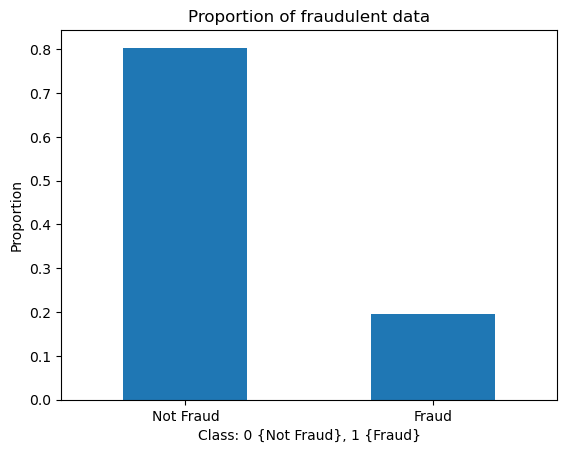

In [30]:
#plot the proportion of fraudulent data
ax = (
    eda_df["Fraud_indicator"]
    .value_counts(normalize=True)
    .plot
    .bar()
)

#set x-axis tick labels
ax.set_xticklabels(["Not Fraud", "Fraud"], rotation=0) 

#set labels and title
plt.xlabel("Class: 0 {Not Fraud}, 1 {Fraud}")
plt.ylabel("Proportion")
plt.title("Proportion of fraudulent data")

#show the plot
plt.show()

**Summary**

The proportion above shows that about 80.33% of the total data in the "Fraud_indicator" column is categorized as "Not Fraud", while about 19.67% is categorized as "Fraud".

This indicates that the `majority of the data in the dataset tend not to be fraud cases ("Not Fraud"), while a small portion of the data are fraud cases ("Fraud")`.

### *2. Vehicle Speed*

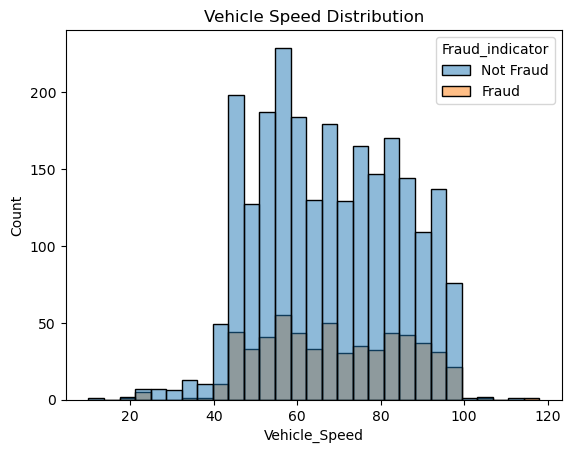

In [31]:
#visualize the Vehicle Speed Distribution
sns.histplot(data = eda_df,
             x = "Vehicle_Speed",
             hue = "Fraud_indicator")

plt.title("Vehicle Speed Distribution")
plt.show()

In [32]:
#check median, minimum, and maximum amount in each class
(
    eda_df
    .groupby(by = "Fraud_indicator")                      #group by class
    .agg({"Vehicle_Speed": ["median", "min", "max"]})     #take aggregate on Vehicle_Speed column
)

Vehicle_Speed         
                       median min  max
Fraud_indicator                       
Fraud                    68.0  20  118
Not Fraud                67.0  10  111

In [33]:
#descriptive of age by response fraud
eda_df['Vehicle_Speed'].groupby(eda_df["Fraud_indicator"]).describe()

,count,mean,std,min,25%,50%,75%,max
Fraud_indicator,,,,,,,,
Fraud,590.0,68.750847,16.643795,20.0,55.25,68.0,82.0,118.0
Not Fraud,2410.0,67.696680,16.538209,10.0,54.00,67.0,82.0,111.0


**Summary**

1. Fraudulent transactions have a median speed of 68 km/h, ranging from 20 km/h to 118 km/h, while non-fraudulent transactions have a median speed of 67 km/h, ranging from 10 km/h to 111 km/h.
2. The mean speed for fraudulent transactions is approximately 68.75 km/h, with a standard deviation of around 16.64 km/h. On the other hand, the mean speed for non-fraudulent transactions is approximately 67.70 km/h, with a standard deviation of around 16.54 km/h.
3. Comparing the statistics, fraudulent transactions generally exhibit slightly higher median and mean speeds compared to non-fraudulent transactions.

### *3. Amount Paid*

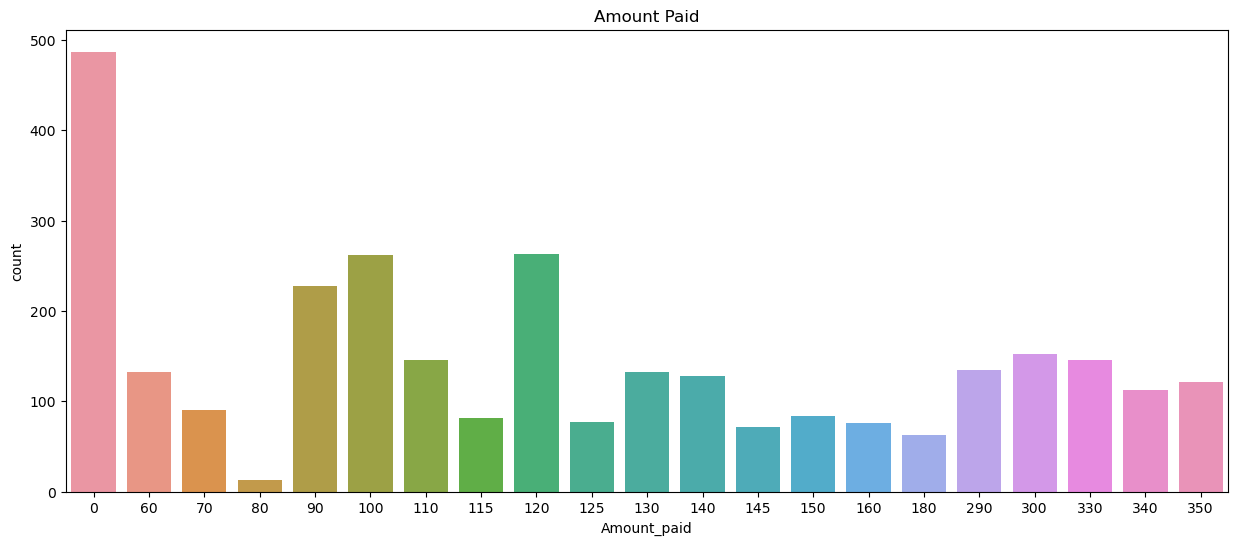

In [34]:
#setting the figure size for the plot
plt.figure(figsize=(15, 6)) 

#creating a count plot to visualize the distribution of 'Amount_paid'
sns.countplot(data=eda_df, x="Amount_paid")

#adding a title to the plot
plt.title("Amount Paid")
#displaying the plot
plt.show()

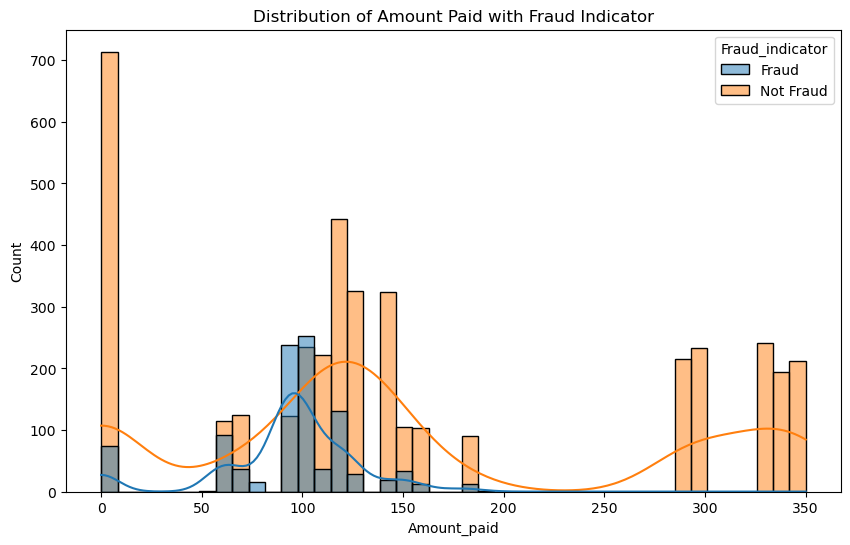

In [35]:
#setting the figure size for the plot
plt.figure(figsize=(10, 6))

#creating a histogram with KDE (Kernel Density Estimation) to visualize the distribution of 'Amount_paid'
#the 'Fraud_indicator' is used to distinguish between fraud and non-fraud transactions
sns.histplot(data=data, x='Amount_paid', hue='Fraud_indicator', kde=True)

#adding a title to the plot
plt.title('Distribution of Amount Paid with Fraud Indicator')

#displaying the plot
plt.show()

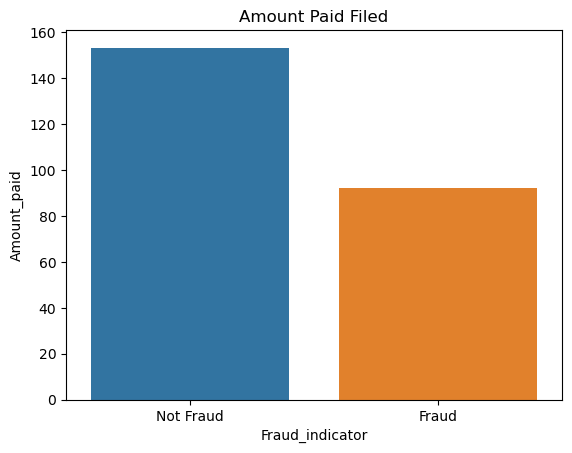

In [36]:
#creating a bar plot to visualize the relationship between 'Fraud_indicator' and 'Amount_paid'
#the x-axis represents the fraud indicator, and the y-axis represents the mean 'Amount_paid' for each category
#error bars are not included in this visualization
sns.barplot(data = eda_df,
            x = "Fraud_indicator",
            y = "Amount_paid",
            errorbar = None)

#adding a title to the plot
plt.title("Amount Paid Filed")

#displaying the plot
plt.show()

In [37]:
#check median, minimum, and maximum amount in each class
(
    eda_df
    .groupby(by = "Fraud_indicator")                      #group by class
    .agg({"Amount_paid": ["median", "min", "max"]})       #take aggregate on Amount_paid column
)

Amount_paid         
                     median min  max
Fraud_indicator                     
Fraud                 100.0   0  180
Not Fraud             125.0   0  350

In [38]:
#descriptive of age by response fraud
eda_df['Amount_paid'].groupby(eda_df["Fraud_indicator"]).describe()

,count,mean,std,min,25%,50%,75%,max
Fraud_indicator,,,,,,,,
Fraud,590.0,92.076271,35.668050,0.0,90.0,100.0,110.0,180.0
Not Fraud,2410.0,153.192946,114.925401,0.0,90.0,125.0,290.0,350.0


**Summary**

1. For fraudulent transactions, the median amount paid is $100, ranging from $0 to $180, while for non-fraudulent transactions, the median amount paid is $125, ranging from $0 to $350.
2. The mean amount paid for fraudulent transactions is approximately $92.08, with a standard deviation of around $35.67. For non-fraudulent transactions, the mean amount paid is approximately $153.19, with a standard deviation of around $114.93.
3. Comparing the statistics, it appears that non-fraudulent transactions tend to have higher median and mean amounts paid compared to fraudulent transactions. However, fraudulent transactions exhibit less variability in the amount paid, as indicated by the lower standard deviation.

### *4. Transaction Amount*

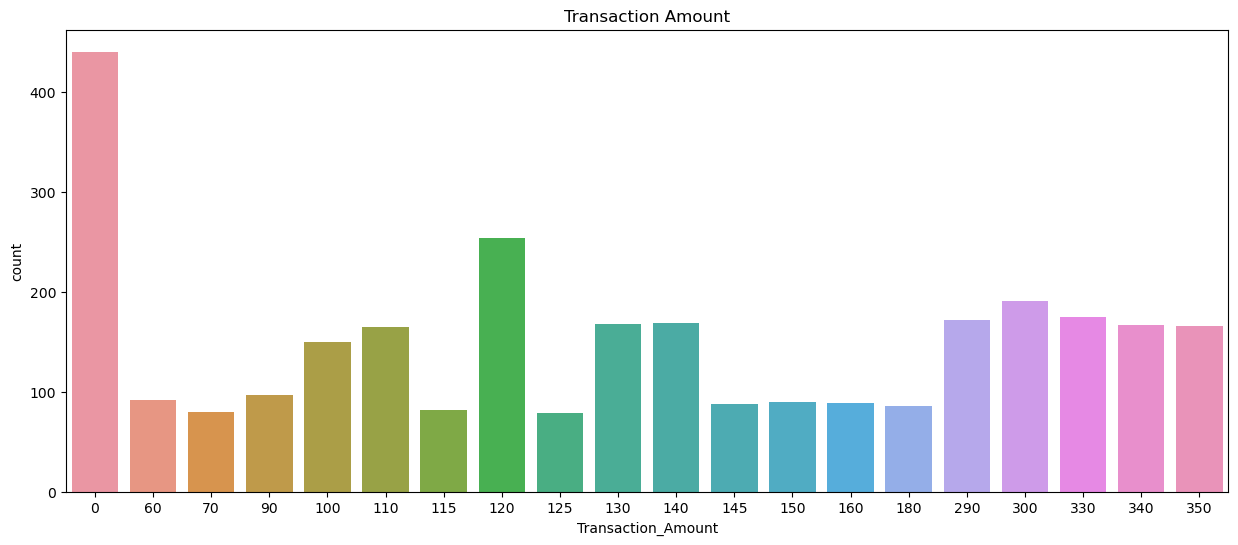

In [39]:
#create a figure with a specific size
plt.figure(figsize=(15, 6)) 

#plot the count of transactions based on their transaction amount
sns.countplot(data=eda_df, x="Transaction_Amount")

#set the title of the plot
plt.title("Transaction Amount")

#display the plot
plt.show()

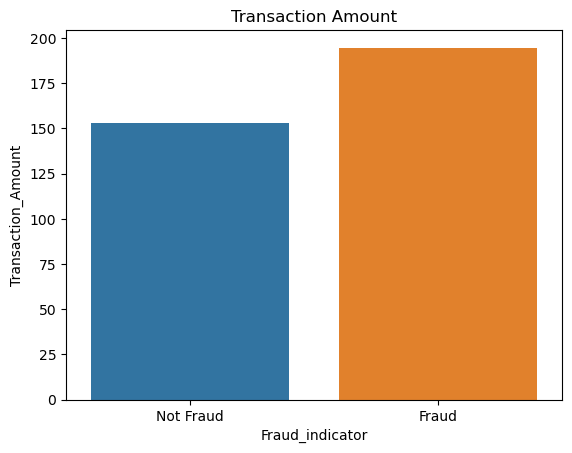

In [40]:
#create a bar plot showing the mean transaction amount for each fraud indicator category
sns.barplot(data = eda_df,
            x = "Fraud_indicator",
            y = "Transaction_Amount",
            errorbar = None)

#set the title of the plot
plt.title("Transaction Amount")

#show the plot
plt.show()

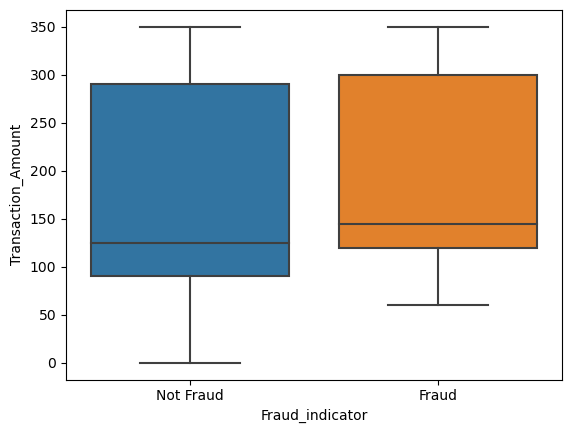

In [41]:
#create a boxplot to visualize the distribution of transaction amount for each fraud indicator category
sns.boxplot(x='Fraud_indicator', y='Transaction_Amount', data=eda_df)

#show the  plot
plt.show()

In [42]:
#check median, minimum, and maximum amount in each class
(
    eda_df
    .groupby(by = "Fraud_indicator")                             #group by class
    .agg({"Transaction_Amount": ["median", "min", "max"]})       #take aggregate on Transaction_Amount column
)

Transaction_Amount         
                            median min  max
Fraud_indicator                            
Fraud                        145.0  60  350
Not Fraud                    125.0   0  350

In [43]:
#descriptive of age by response fraud
eda_df['Transaction_Amount'].groupby(eda_df["Fraud_indicator"]).describe()

,count,mean,std,min,25%,50%,75%,max
Fraud_indicator,,,,,,,,
Fraud,590.0,194.711864,98.218866,60.0,120.0,145.0,300.0,350.0
Not Fraud,2410.0,153.192946,114.925401,0.0,90.0,125.0,290.0,350.0


**Summary**

1. For fraudulent transactions, the median transaction amount is 145 units, ranging from 60 units to 350 units.
2. For non-fraudulent transactions, the median transaction amount is 125 units, ranging from 0 units to 350 units.
3. The mean transaction amount for fraudulent transactions is approximately 194.71 units, with a standard deviation of around 98.22 units.
4. The mean transaction amount for non-fraudulent transactions is approximately 153.19 units, with a standard deviation of around 114.93 units.

*Distribution between Transaction Amount, Amount Paid and Vehicle Speed*

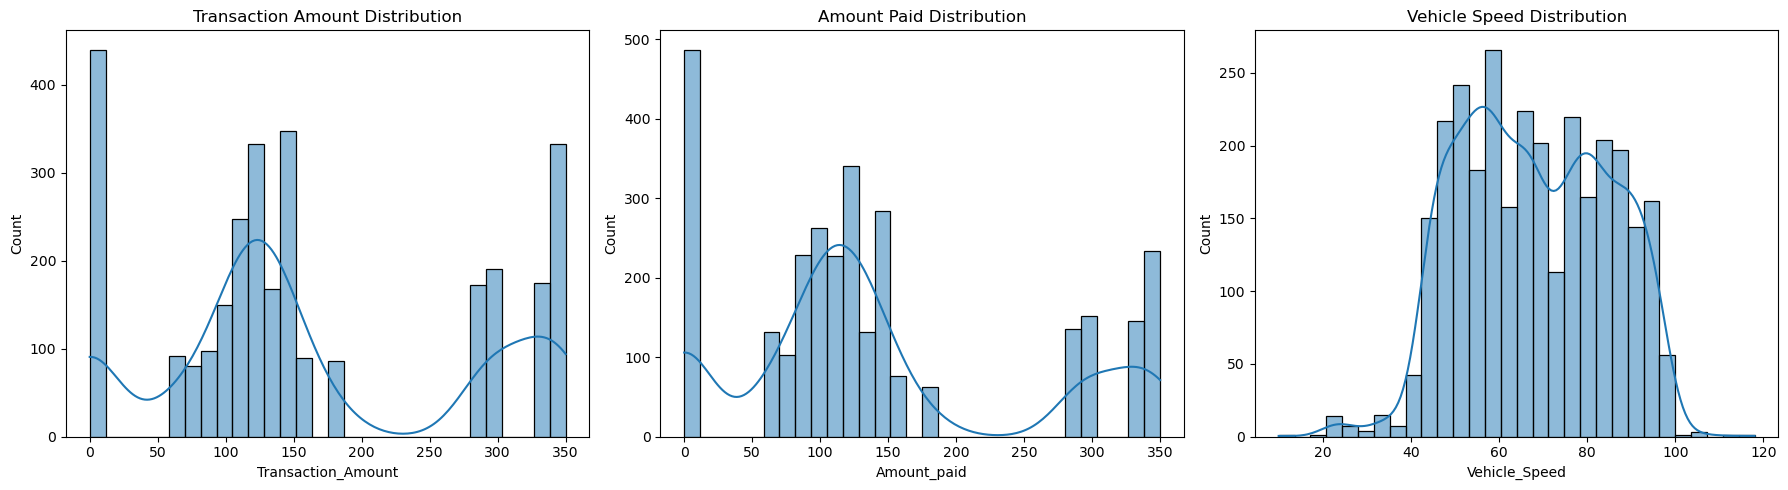

In [44]:
# Distribution Analysis for Key Numerical Variables
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Histograms for Transaction_Amount, Amount_paid, and Vehicle_Speed
sns.histplot(eda_df['Transaction_Amount'], bins=30, ax=axes[0], kde=True)
axes[0].set_title('Transaction Amount Distribution')

sns.histplot(eda_df['Amount_paid'], bins=30, ax=axes[1], kde=True)
axes[1].set_title('Amount Paid Distribution')

sns.histplot(eda_df['Vehicle_Speed'], bins=30, ax=axes[2], kde=True)
axes[2].set_title('Vehicle Speed Distribution')

plt.tight_layout()

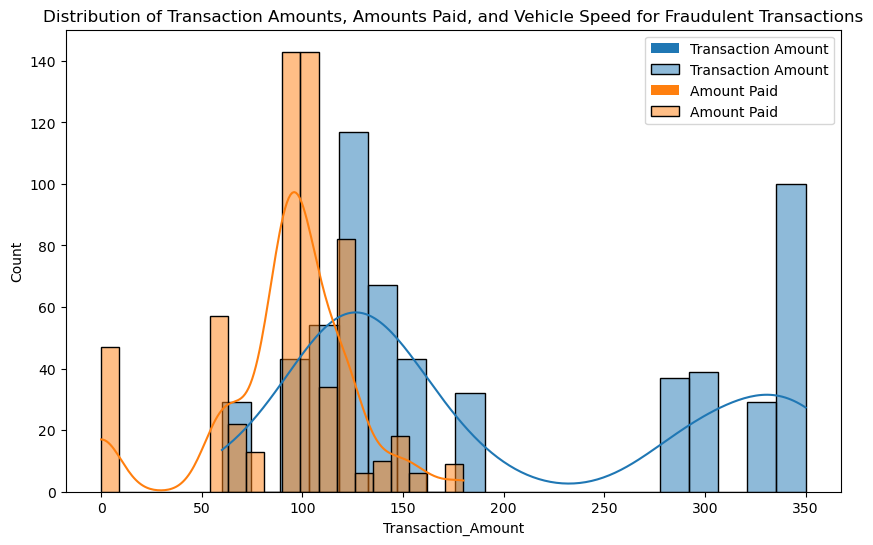

In [45]:
#create a figure with specified size
plt.figure(figsize=(10, 6))

#filter the data to include only fraudulent transactions
fraud_data = eda_df[eda_df['Fraud_indicator'] == 'Fraud']

#plot histograms for Transaction Amount and Amount Paid for fraudulent transactions
sns.histplot(fraud_data['Transaction_Amount'], bins=20, kde=True, label='Transaction Amount')
sns.histplot(fraud_data['Amount_paid'], bins=20, kde=True, label='Amount Paid')

#set title and legend
plt.title('Distribution of Transaction Amounts, Amounts Paid, and Vehicle Speed for Fraudulent Transactions')
plt.legend()

#show the plot
plt.show()


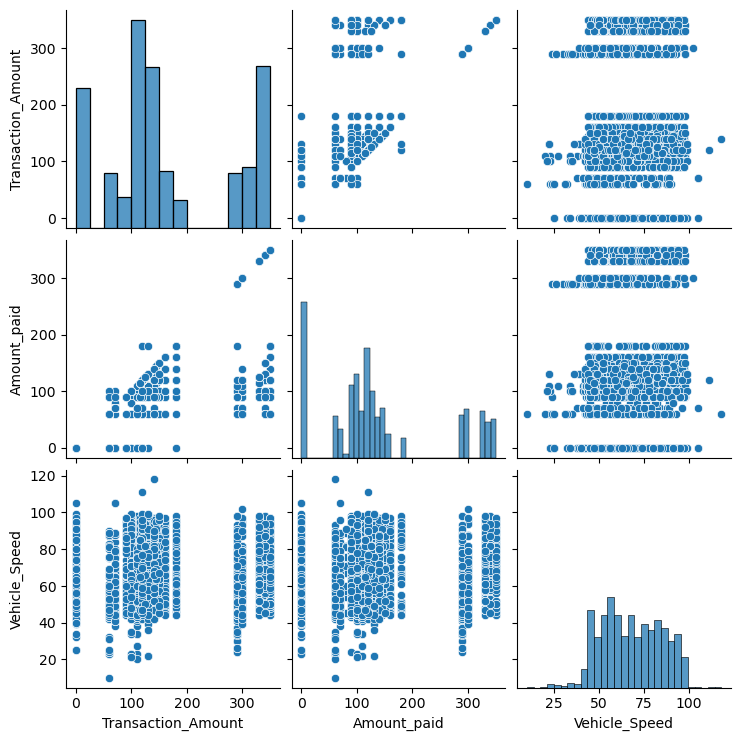

In [46]:
#visualize pairwise relationships between numerical features using a pairplot
sns.pairplot(eda_df)
plt.show()

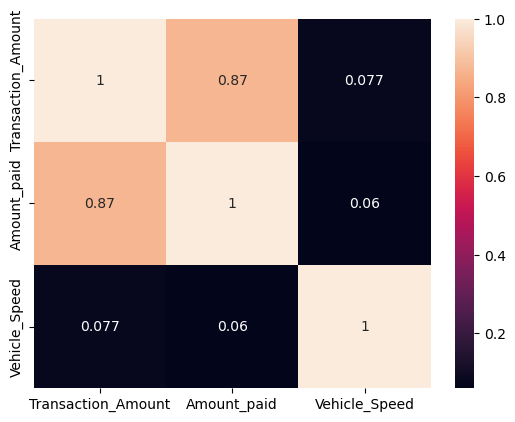

In [47]:
#compute the correlation matrix
corr_matrix = eda_df[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']].corr()
#plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

**Summary**

1. There is a strong positive correlation of approximately 0.87 between Transaction Amount and Amount Paid. This indicates that as the Transaction Amount increases, the Amount Paid also tends to increase proportionally.
2. There is a weak positive correlation of approximately 0.077 between Transaction Amount and Vehicle Speed. This suggests that there is a slight tendency for higher transaction amounts to be associated with slightly higher vehicle speeds, but the correlation is not strong.
3. There is a weak positive correlation of approximately 0.06 between Amount Paid and Vehicle Speed. This implies that there is a slight tendency for higher amounts paid to be associated with slightly higher vehicle speeds, but again, the correlation is not strong.

### *5. Vehicle Type*

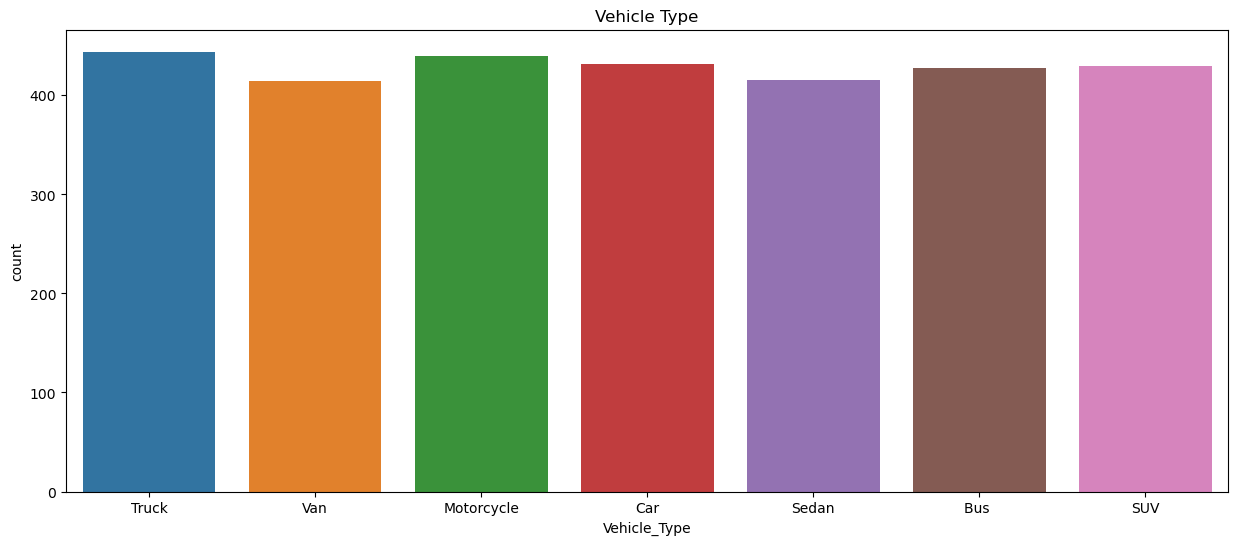

In [48]:
#visualize the Vehicle Type
plt.figure(figsize=(15, 6)) 
sns.countplot(data = eda_df,
              x = "Vehicle_Type")
plt.title("Vehicle Type")
plt.show()

In [49]:
#descriptive of Vehicle Type by response fraud
eda_df['Vehicle_Type'].groupby(eda_df["Fraud_indicator"]).describe()

,count,unique,top,freq
Fraud_indicator,,,,
Fraud,590,6,Van,113
Not Fraud,2410,7,Motorcycle,440


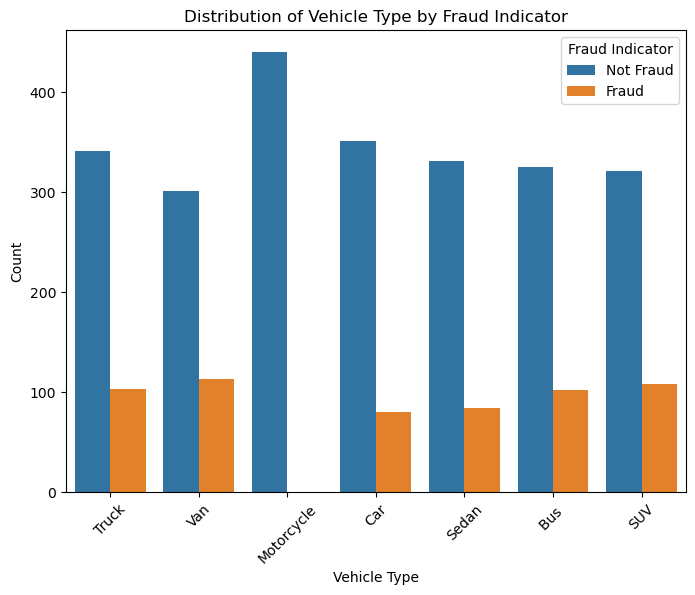

In [50]:
#plot the count of each vehicle type by fraud indicator
plt.figure(figsize=(8, 6))
sns.countplot(data=eda_df, x="Vehicle_Type", hue="Fraud_indicator")
plt.title("Distribution of Vehicle Type by Fraud Indicator")
plt.xlabel("Vehicle Type")
plt.ylabel("Count")
plt.legend(title="Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

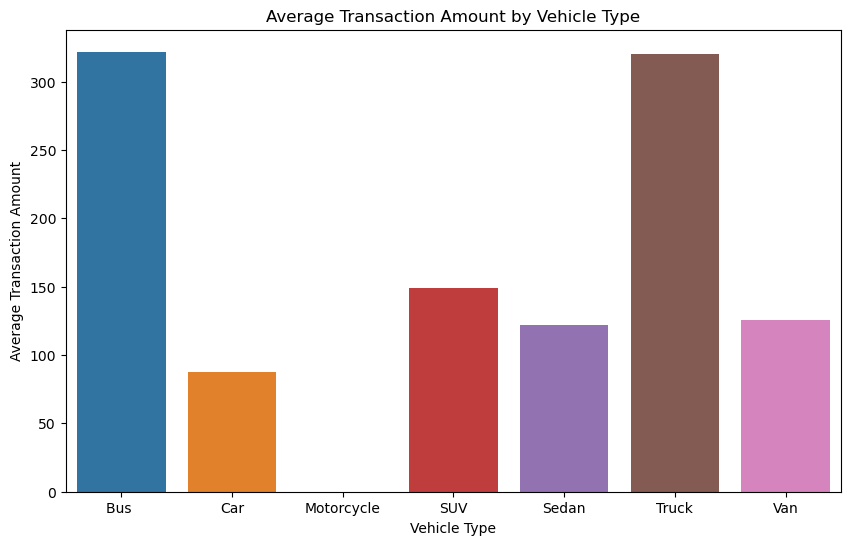

In [51]:
#calculate the average transaction amount by vehicle type
vehicle_dist = eda_df.groupby('Vehicle_Type')['Transaction_Amount'].mean()

#plot the average transaction amount by vehicle type
plt.figure(figsize=(10, 6))
sns.barplot(x=vehicle_dist.index, y=vehicle_dist.values)
plt.title('Average Transaction Amount by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Average Transaction Amount')
plt.show()

**Summary**

1. Motorcycle is the highest vehicle type when not fraud and the lowest vehicle type when not fraud is van.
2. Van is the most common vehicle type when fraud occurs and there is no motorcycle vehicle type when fraud occurs.
3. The average number of transactions is highest for bus and truck, lowest for motorcycles.

### *6. TollBooth ID*

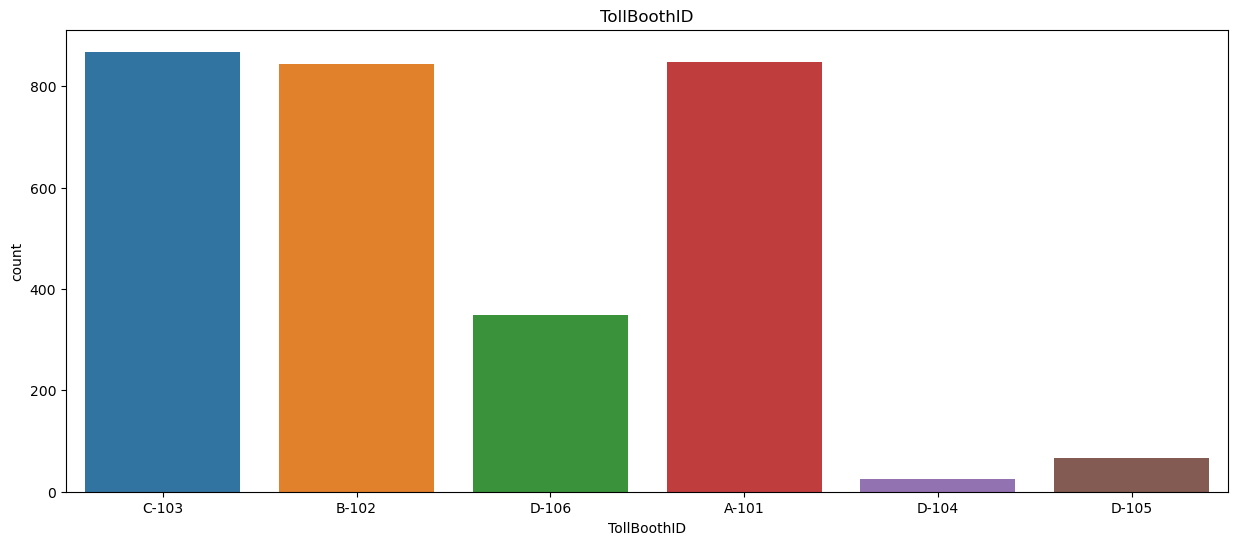

In [52]:
#plotting the count of transactions for each TollBoothID
plt.figure(figsize=(15, 6)) 
sns.countplot(data=eda_df, x="TollBoothID")
plt.title("TollBoothID")
plt.show()

In [53]:
#descriptive of TollBoothID by response fraud
eda_df['TollBoothID'].groupby(eda_df["Fraud_indicator"]).describe()

,count,unique,top,freq
Fraud_indicator,,,,
Fraud,590,3,B-102,222
Not Fraud,2410,6,A-101,683


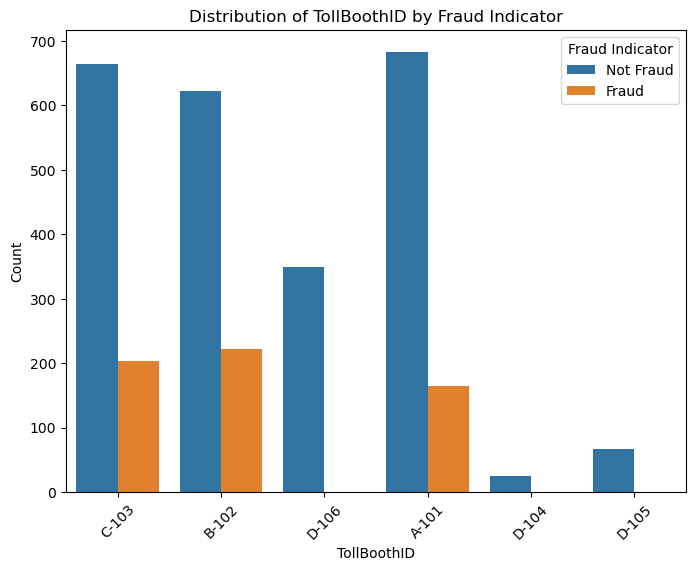

In [54]:
#plotting the distribution of TollBoothID by Fraud Indicator
plt.figure(figsize=(8, 6))
sns.countplot(data=eda_df, x="TollBoothID", hue="Fraud_indicator")
plt.title("Distribution of TollBoothID by Fraud Indicator")
plt.xlabel("TollBoothID")
plt.ylabel("Count")
plt.legend(title="Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

**Summary**

1. For fraudulent transactions, there are 3 unique Toll Booth IDs, with the most frequent one being B-102, which occurred 222 times out of 590 fraud transactions.
2. For non-fraudulent transactions, there are 6 unique Toll Booth IDs, with the most frequent one being A-101, which occurred 683 times out of 2410 non-fraud transactions.

### *7. Geographical Location*

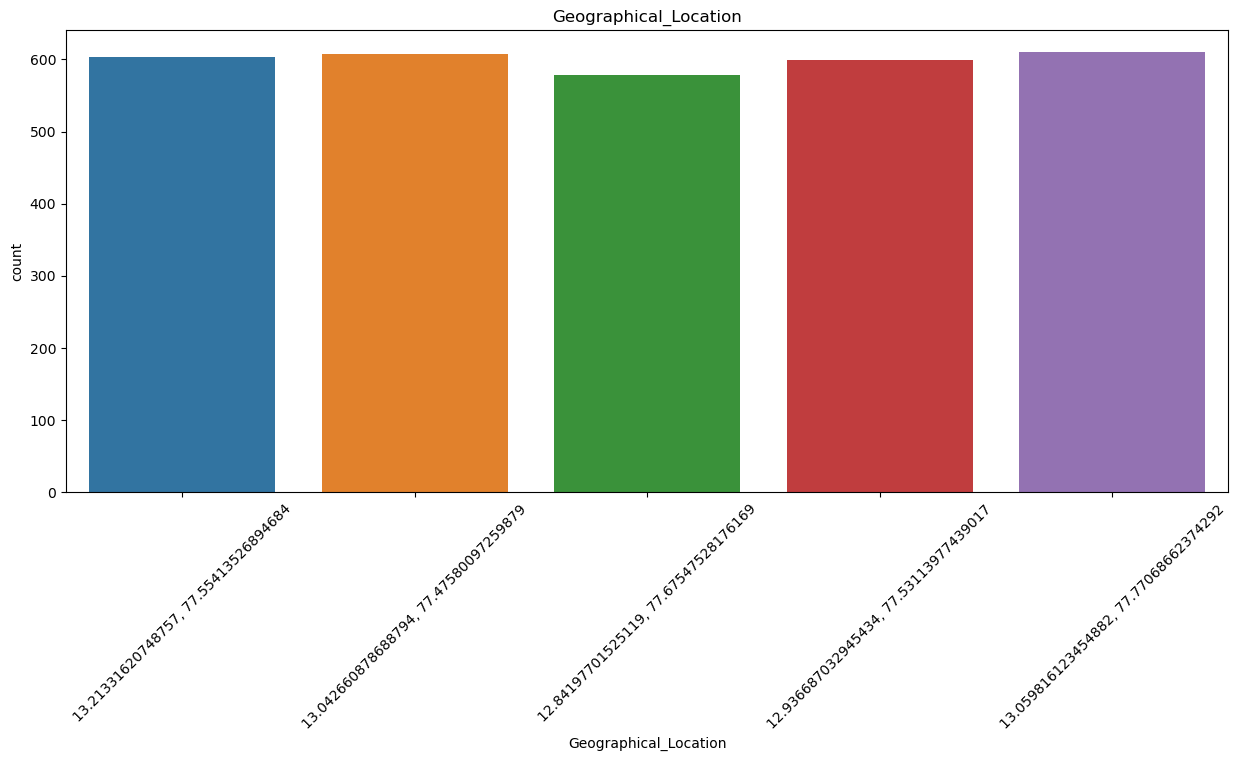

In [55]:
plt.figure(figsize=(15, 6)) 
sns.countplot(data=eda_df, x="Geographical_Location")
plt.xticks(rotation=45)
plt.title("Geographical_Location")
plt.show()

In [56]:
#descriptive of Geographical_Location by response fraud
eda_df['Geographical_Location'].groupby(eda_df["Fraud_indicator"]).describe()

,count,unique,top,freq
Fraud_indicator,,,,
Fraud,590,5,"13.059816123454882, 77.77068662374292",153
Not Fraud,2410,5,"13.21331620748757, 77.55413526894684",521


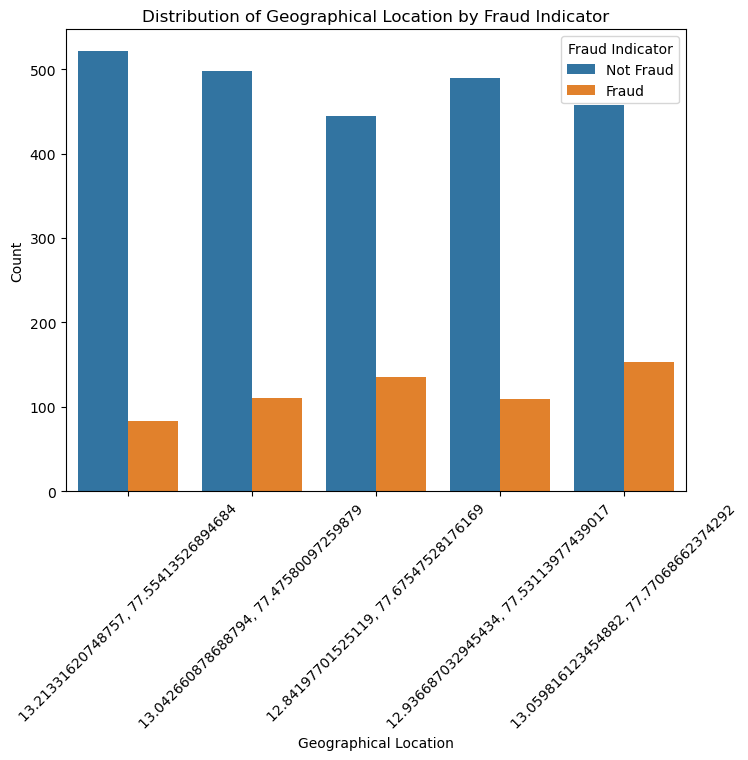

In [57]:
plt.figure(figsize=(8, 6))
sns.countplot(data=eda_df, x="Geographical_Location", hue="Fraud_indicator")
plt.title("Distribution of Geographical Location by Fraud Indicator")
plt.xlabel("Geographical Location")
plt.ylabel("Count")
plt.legend(title="Fraud Indicator")
plt.xticks(rotation=45)
plt.show()

**Summary**

1. For fraudulent transactions, the most frequent geographical location is approximately (13.06, 77.77) with 153 occurrences.
2. For non-fraudulent transactions, the most frequent geographical location is approximately (13.21, 77.55) with 521 occurrences.

### *8. Vehicle Dimensions*

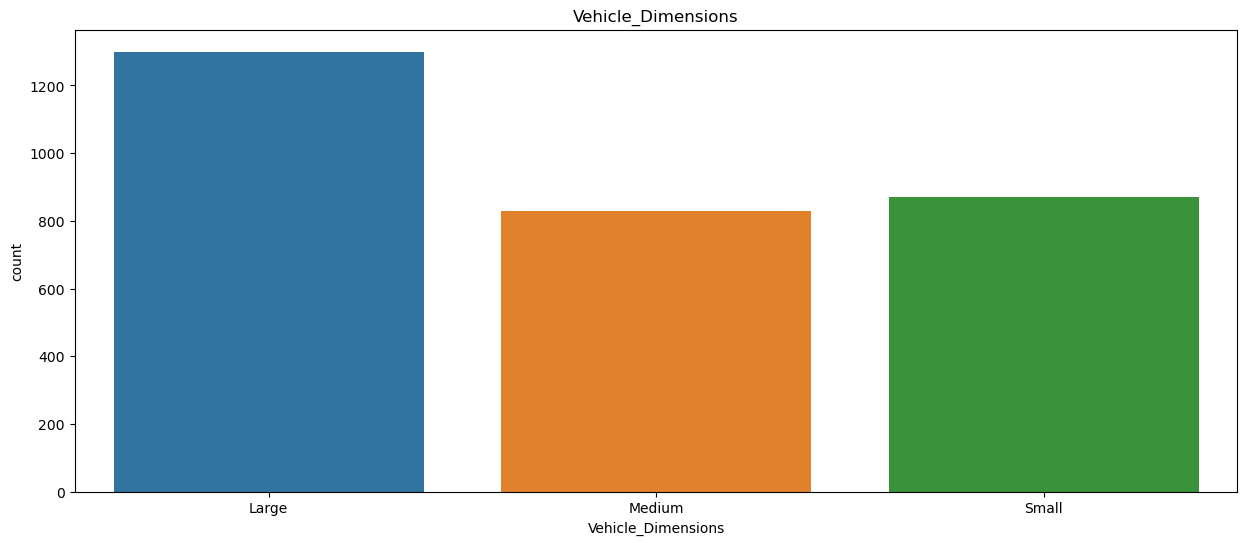

In [58]:
plt.figure(figsize=(15, 6)) 
sns.countplot(data=eda_df, x="Vehicle_Dimensions")
plt.xticks(rotation=0)
plt.title("Vehicle_Dimensions")
plt.show()

In [59]:
#descriptive of Vehicle_Dimensions by response fraud
eda_df['Vehicle_Dimensions'].groupby(eda_df["Fraud_indicator"]).describe()

,count,unique,top,freq
Fraud_indicator,,,,
Fraud,590,3,Large,313
Not Fraud,2410,3,Large,987


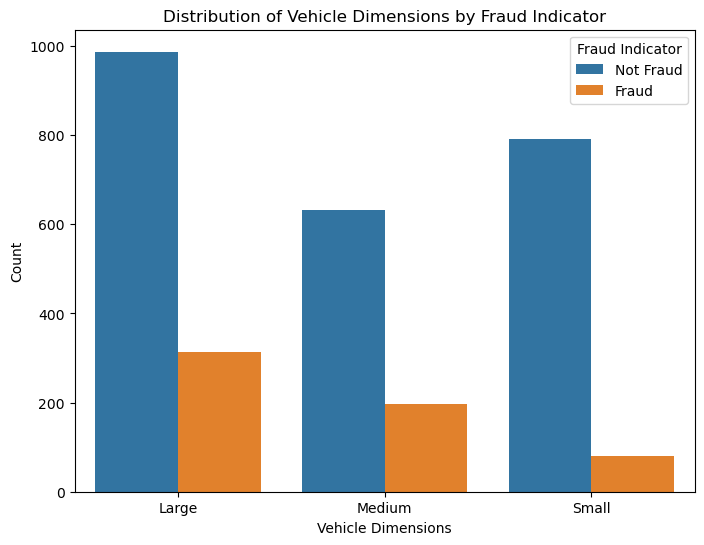

In [60]:
plt.figure(figsize=(8, 6))
sns.countplot(data=eda_df, x="Vehicle_Dimensions", hue="Fraud_indicator")
plt.title("Distribution of Vehicle Dimensions by Fraud Indicator")
plt.xlabel("Vehicle Dimensions")
plt.ylabel("Count")
plt.legend(title="Fraud Indicator")
plt.xticks(rotation=0)
plt.show()

**Summary**

1. For fraudulent transactions, the most frequent vehicle dimension is "Large" with 313 occurrences.
2. For non-fraudulent transactions, the most frequent vehicle dimension is also "Large" with 987 occurrences.

### *9. Lane Type*

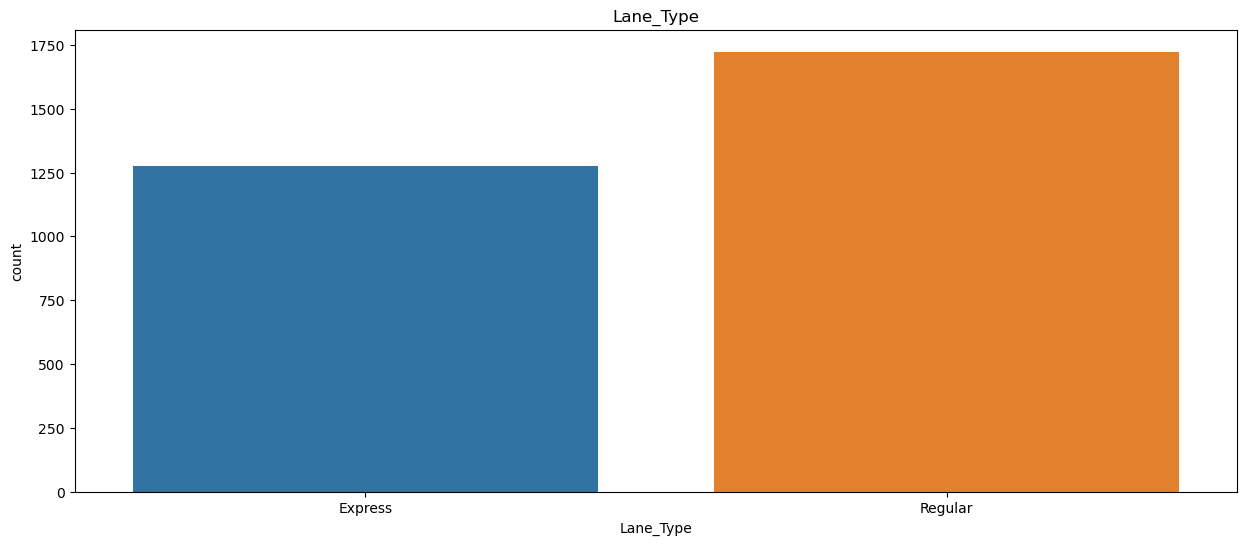

In [61]:
plt.figure(figsize=(15, 6)) 
sns.countplot(data=eda_df, x="Lane_Type")
plt.xticks(rotation=0)
plt.title("Lane_Type")
plt.show()

In [62]:
#descriptive of Lane_Type by response fraud
eda_df['Lane_Type'].groupby(eda_df["Fraud_indicator"]).describe()

,count,unique,top,freq
Fraud_indicator,,,,
Fraud,590,2,Regular,301
Not Fraud,2410,2,Regular,1422


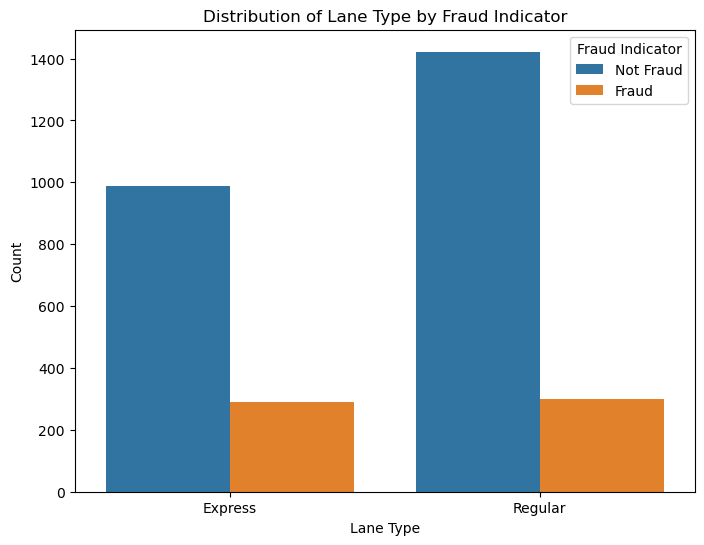

In [63]:
plt.figure(figsize=(8, 6))

sns.countplot(data=eda_df, x="Lane_Type", hue="Fraud_indicator")

plt.title("Distribution of Lane Type by Fraud Indicator")
plt.xlabel("Lane Type")
plt.ylabel("Count")

plt.legend(title="Fraud Indicator")

plt.xticks(rotation=0)
plt.show()

**Summary**

1. For fraudulent transactions, the most frequent lane type is "Regular" with 301 occurrences.
2. For non-fraudulent transactions, the most frequent lane type is also "Regular" with 1422 occurrences.

## **5. Handle Unknown Category**

### **5.1 Categorization**

In [64]:

def create_binning(data, predictor_label, num_of_bins):
    """
    Create bins for a numerical predictor in the dataset using quantiles (equal-sized bins).
    
    Args:
    - data: The DataFrame containing the dataset.
    - predictor_label: The label of the predictor variable to be binned.
    - num_of_bins: The number of bins to create.
    
    Returns:
    - data: The DataFrame with an additional column containing the binned values.
    """
    #create a new column containing the binned predictor
    data[predictor_label + "_bin"] = pd.qcut(data[predictor_label],
                                             q = num_of_bins,
                                             duplicates = "drop")

    return data

In [65]:
#define the response variable
response_variable = "Fraud_indicator"
#define numerical columns
num_col = ["Vehicle_Speed", "Amount_paid", "Transaction_Amount"]
#define categorical columns excluding the response variable
cat_col = [col for col in eda_df.columns if col != response_variable and col in eda_df.select_dtypes(include="O").columns]

In [66]:
#apply binning to each numerical column in num_col
for column in num_col:
    data_train_binned = create_binning(data = eda_df,
                                       predictor_label = column,
                                       num_of_bins = 4)

### **5.2 WOE & IV**

To assess the strength of each characteristic individually as a predictor of the fastag transaction performance.

First, create a contingency table/crosstab for all predictors: numerical and categorical predictors.

In [67]:
#initialize empty lists to store crosstabs
crosstab_num = []

#create crosstabs for numerical columns
for column in num_col:
  #create a contingency table
  crosstab = pd.crosstab(data_train_binned[column + "_bin"],
                         data_train_binned[response_variable],
                         margins = True)
  #append to the list
  crosstab_num.append(crosstab)

#define the initial empty list
crosstab_cat = []

#create crosstabs for numerical columns
for column in cat_col:

  #create a contingency table
  crosstab = pd.crosstab(data_train_binned[column],
                         data_train_binned[response_variable],
                         margins = True)
  #append to the list
  crosstab_cat.append(crosstab)

#combine crosstabs from numerical and categorical columns into a single list
crosstab_list = crosstab_num + crosstab_cat

#display each crosstab in the list
for i in crosstab_list:
    display(i)

Fraud_indicator,Fraud,Not Fraud,All
Vehicle_Speed_bin,,,
"(9.999, 55.0]",148,667,815
"(55.0, 67.0]",142,574,716
"(67.0, 82.0]",154,626,780
"(82.0, 118.0]",146,543,689
All,590,2410,3000


Fraud_indicator,Fraud,Not Fraud,All
Amount_paid_bin,,,
"(-0.001, 90.0]",282,668,950
"(90.0, 120.0]",247,505,752
"(120.0, 160.0]",52,517,569
"(160.0, 350.0]",9,720,729
All,590,2410,3000


Fraud_indicator,Fraud,Not Fraud,All
Transaction_Amount_bin,,,
"(-0.001, 100.0]",72,787,859
"(100.0, 130.0]",171,577,748
"(130.0, 290.0]",179,515,694
"(290.0, 350.0]",168,531,699
All,590,2410,3000


Fraud_indicator,Fraud,Not Fraud,All
Vehicle_Type,,,
Bus,102,325,427
Car,80,351,431
Motorcycle,0,440,440
SUV,108,321,429
Sedan,84,331,415
Truck,103,341,444
Van,113,301,414
All,590,2410,3000


Fraud_indicator,Fraud,Not Fraud,All
TollBoothID,,,
A-101,165,683,848
B-102,222,622,844
C-103,203,665,868
D-104,0,25,25
D-105,0,66,66
D-106,0,349,349
All,590,2410,3000


Fraud_indicator,Fraud,Not Fraud,All
Lane_Type,,,
Express,289,988,1277
Regular,301,1422,1723
All,590,2410,3000


Fraud_indicator,Fraud,Not Fraud,All
Vehicle_Dimensions,,,
Large,313,987,1300
Medium,197,632,829
Small,80,791,871
All,590,2410,3000


Fraud_indicator,Fraud,Not Fraud,All
Geographical_Location,,,
"12.84197701525119, 77.67547528176169",135,444,579
"12.936687032945434, 77.53113977439017",109,490,599
"13.042660878688794, 77.47580097259879",110,498,608
"13.059816123454882, 77.77068662374292",153,457,610
"13.21331620748757, 77.55413526894684",83,521,604
All,590,2410,3000


Calculate the WOE and IV for each crosstab.

1. Weight of Evidence (WoE) — measures the strength of each attribute.

$$
\begin{align*}
W_i &= \ln ( \% \text{Good} / \% \text{Bad} ) \\
W_i &= \ln \left ( \left ( \frac{N_i}{\sum N} \right ) / \left ( \frac{P_i}{\sum P} \right )\right ) \\
\end{align*}
$$

2. Information Value (IV) — measures the total strength of the characteristic.

$$
\begin{align*}
IV &= \sum_{i=1}^{n} ( \% \text{Good} - \% \text{Bad} ) \times W_i \\
IV &= \sum_{i=1}^{n}\left [ \left ( \frac{N_i}{\sum N} - \frac{P_i}{\sum P} \right ) \times W_i \right ] \\
\end{align*}
$$

In [68]:
#initialize lists to store WOE (Weight of Evidence) and IV (Information Value)
WOE_list = []
IV_list = []

#calculate WOE and IV for each characteristic
for crosstab in crosstab_list:

  #calculate the proportion of good and bad
  crosstab['p_good'] = crosstab["Not Fraud"]/crosstab["Not Fraud"]['All']
  crosstab['p_bad'] = crosstab["Fraud"]/crosstab["Fraud"]['All']

  #calculate the WOE (Weight of Evidence) and add a small value to prevent division by zero
  crosstab['WOE'] = np.log(crosstab['p_good']/(crosstab['p_bad'] + 1e-6)) 
  
  #calculate contribution to IV
  crosstab['contribution'] = (crosstab['p_good']-crosstab['p_bad'])*crosstab['WOE']
  #calculate IV (Information Value) for the characteristic
  IV = crosstab['contribution'][:-1].sum()

  #store IV in IV_list
  add_IV = {'Characteristic': crosstab.index.name,
            'Information Value': IV}
  
  #store crosstab with WOE in WOE_list
  WOE_list.append(crosstab)
  IV_list.append(add_IV)

#display WOE (Weight of Evidence) for each characteristic
for i in WOE_list:
    display(i)

Fraud_indicator,Fraud,Not Fraud,All,p_good,p_bad,WOE,contribution
Vehicle_Speed_bin,,,,,,,
"(9.999, 55.0]",148,667,815,0.276763,0.250847,9.831430e-02,0.002548
"(55.0, 67.0]",142,574,716,0.238174,0.240678,-1.046131e-02,0.000026
"(67.0, 82.0]",154,626,780,0.259751,0.261017,-4.865552e-03,0.000006
"(82.0, 118.0]",146,543,689,0.225311,0.247458,-9.376083e-02,0.002076
All,590,2410,3000,1.000000,1.000000,-9.999995e-07,-0.000000


Fraud_indicator,Fraud,Not Fraud,All,p_good,p_bad,WOE,contribution
Amount_paid_bin,,,,,,,
"(-0.001, 90.0]",282,668,950,0.277178,0.477966,-5.448805e-01,0.109405
"(90.0, 120.0]",247,505,752,0.209544,0.418644,-6.920918e-01,0.144717
"(120.0, 160.0]",52,517,569,0.214523,0.088136,8.895283e-01,0.112425
"(160.0, 350.0]",9,720,729,0.298755,0.015254,2.974702e+00,0.843331
All,590,2410,3000,1.000000,1.000000,-9.999995e-07,-0.000000


Fraud_indicator,Fraud,Not Fraud,All,p_good,p_bad,WOE,contribution
Transaction_Amount_bin,,,,,,,
"(-0.001, 100.0]",72,787,859,0.326556,0.122034,9.842944e-01,0.201310
"(100.0, 130.0]",171,577,748,0.239419,0.289831,-1.910842e-01,0.009633
"(130.0, 290.0]",179,515,694,0.213693,0.303390,-3.504817e-01,0.031437
"(290.0, 350.0]",168,531,699,0.220332,0.284746,-2.564650e-01,0.016520
All,590,2410,3000,1.000000,1.000000,-9.999995e-07,-0.000000


Fraud_indicator,Fraud,Not Fraud,All,p_good,p_bad,WOE,contribution
Vehicle_Type,,,,,,,
Bus,102,325,427,0.134855,0.172881,-2.484129e-01,0.009446
Car,80,351,431,0.145643,0.135593,7.149272e-02,0.000718
Motorcycle,0,440,440,0.182573,0.000000,1.211490e+01,2.211850
SUV,108,321,429,0.133195,0.183051,-3.179551e-01,0.015852
Sedan,84,331,415,0.137344,0.142373,-3.596494e-02,0.000181
Truck,103,341,444,0.141494,0.174576,-2.101117e-01,0.006951
Van,113,301,414,0.124896,0.191525,-4.275423e-01,0.028487
All,590,2410,3000,1.000000,1.000000,-9.999995e-07,-0.000000


Fraud_indicator,Fraud,Not Fraud,All,p_good,p_bad,WOE,contribution
TollBoothID,,,,,,,
A-101,165,683,848,0.283402,0.279661,1.328632e-02,0.000050
B-102,222,622,844,0.258091,0.376271,-3.769994e-01,0.044554
C-103,203,665,868,0.275934,0.344068,-2.206813e-01,0.015036
D-104,0,25,25,0.010373,0.000000,9.247004e+00,0.095923
D-105,0,66,66,0.027386,0.000000,1.021778e+01,0.279823
D-106,0,349,349,0.144813,0.000000,1.188320e+01,1.720845
All,590,2410,3000,1.000000,1.000000,-9.999995e-07,-0.000000


Fraud_indicator,Fraud,Not Fraud,All,p_good,p_bad,WOE,contribution
Lane_Type,,,,,,,
Express,289,988,1277,0.409959,0.489831,-1.780055e-01,0.014218
Regular,301,1422,1723,0.590041,0.510169,1.454479e-01,0.011617
All,590,2410,3000,1.000000,1.000000,-9.999995e-07,-0.000000


Fraud_indicator,Fraud,Not Fraud,All,p_good,p_bad,WOE,contribution
Vehicle_Dimensions,,,,,,,
Large,313,987,1300,0.409544,0.530508,-2.587945e-01,0.031305
Medium,197,632,829,0.262241,0.333898,-2.415768e-01,0.017311
Small,80,791,871,0.328216,0.135593,8.840045e-01,0.170279
All,590,2410,3000,1.000000,1.000000,-9.999995e-07,-0.000000


Fraud_indicator,Fraud,Not Fraud,All,p_good,p_bad,WOE,contribution
Geographical_Location,,,,,,,
"12.84197701525119, 77.67547528176169",135,444,579,0.184232,0.228814,-2.167141e-01,0.009661
"12.936687032945434, 77.53113977439017",109,490,599,0.203320,0.184746,9.579261e-02,0.001779
"13.042660878688794, 77.47580097259879",110,498,608,0.206639,0.186441,1.028549e-01,0.002077
"13.059816123454882, 77.77068662374292",153,457,610,0.189627,0.259322,-3.130179e-01,0.021816
"13.21331620748757, 77.55413526894684",83,521,604,0.216183,0.140678,4.296428e-01,0.032440
All,590,2410,3000,1.000000,1.000000,-9.999995e-07,-0.000000


In [69]:
#create a DataFrame to display the Information Value (IV) for each characteristic
IV_table = pd.DataFrame(IV_list)
IV_table

,Characteristic,Information Value
0,Vehicle_Speed_bin,0.004657
1,Amount_paid_bin,1.209878
2,Transaction_Amount_bin,0.258900
3,Vehicle_Type,2.273485
4,TollBoothID,2.156231
5,Lane_Type,0.025835
6,Vehicle_Dimensions,0.218895
7,Geographical_Location,0.067774


The rule of thumb regarding IV:
- Less than 0.02 : generally unpredictive
- 0.02 to 0.1 : weak
- 0.1 to 0.3 : medium
- 0.3+ : strong

In [70]:
#initialize an empty list to store the strength category for each IV value
strength = []

#categorize IV values into strength levels
for iv in IV_table['Information Value']:
    if iv < 0.02:
        strength.append('Unpredictive')
    elif iv >= 0.02 and iv < 0.1:
        strength.append('Weak')
    elif iv >= 0.1 and iv < 0.3:
        strength.append('Medium')
    else:
        strength.append('Strong')

#assign the strength categories to the IV table as a new column
IV_table = IV_table.assign(Strength = strength)

#sort the IV table by Information Value
IV_table.sort_values(by='Information Value')

,Characteristic,Information Value,Strength
0,Vehicle_Speed_bin,0.004657,Unpredictive
5,Lane_Type,0.025835,Weak
7,Geographical_Location,0.067774,Weak
6,Vehicle_Dimensions,0.218895,Medium
2,Transaction_Amount_bin,0.258900,Medium
1,Amount_paid_bin,1.209878,Strong
4,TollBoothID,2.156231,Strong
3,Vehicle_Type,2.273485,Strong


There is:
- 1 unpredictable
- 2 weak
- 2 medium
- 3 strong characteristics

Remove the "Vehicle_Speed" column as its strength is unpredictable.

In [71]:
feature_to_drop = 'Vehicle_Speed'

#drop the 'Vehicle_Speed' column from the datasets
X_train = X_train.drop(columns=[feature_to_drop])
X_valid = X_valid.drop(columns=[feature_to_drop])
X_test = X_test.drop(columns=[feature_to_drop])

In [72]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 4652 to 1694
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Vehicle_Type           3000 non-null   object
 1   TollBoothID            3000 non-null   object
 2   Lane_Type              3000 non-null   object
 3   Vehicle_Dimensions     3000 non-null   object
 4   Transaction_Amount     3000 non-null   int64 
 5   Amount_paid            3000 non-null   int64 
 6   Geographical_Location  3000 non-null   object
dtypes: int64(2), object(5)
memory usage: 187.5+ KB


## **6. Handle Unknown Category**

### **6.1 Split Numerical and Categorical Data**

In [73]:
#define numerical data
NUM_COLS = ["Amount_paid", "Transaction_Amount"]
#define categorical data
CAT_COLS = ["Vehicle_Type", "TollBoothID", "Geographical_Location", "Vehicle_Dimensions", "Lane_Type"]

In [74]:
#split numerical and categorical data
X_train_num = X_train[NUM_COLS]
X_train_cat = X_train[CAT_COLS]

In [75]:
X_train_cat.head()

,Vehicle_Type,TollBoothID,Geographical_Location,Vehicle_Dimensions,Lane_Type
4652,Truck,C-103,"13.21331620748757, 77.55413526894684",Large,Express
850,Truck,C-103,"13.042660878688794, 77.47580097259879",Large,Express
3589,Van,B-102,"12.84197701525119, 77.67547528176169",Medium,Regular
4567,Motorcycle,D-106,"13.21331620748757, 77.55413526894684",Small,Regular
1459,Truck,C-103,"12.84197701525119, 77.67547528176169",Large,Regular


### **6.2 Encode Categorical Data**

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [77]:
#initiate OneHotEncoder
encoder = OneHotEncoder(drop='if_binary',           #if the value is only 2, drop one
                        handle_unknown='ignore')    #ignore unknown categories during transformation

In [78]:
#fit the OneHotEncoder on the categorical features in the training data
encoder.fit(X_train_cat)

OneHotEncoder(drop='if_binary', handle_unknown='ignore')

In [79]:
#get the feature names after one-hot encoding
encoder.get_feature_names_out()

array(['Vehicle_Type_Bus ', 'Vehicle_Type_Car', 'Vehicle_Type_Motorcycle',
       'Vehicle_Type_SUV', 'Vehicle_Type_Sedan', 'Vehicle_Type_Truck',
       'Vehicle_Type_Van', 'TollBoothID_A-101', 'TollBoothID_B-102',
       'TollBoothID_C-103', 'TollBoothID_D-104', 'TollBoothID_D-105',
       'TollBoothID_D-106',
       'Geographical_Location_12.84197701525119, 77.67547528176169',
       'Geographical_Location_12.936687032945434, 77.53113977439017',
       'Geographical_Location_13.042660878688794, 77.47580097259879',
       'Geographical_Location_13.059816123454882, 77.77068662374292',
       'Geographical_Location_13.21331620748757, 77.55413526894684',
       'Vehicle_Dimensions_Large', 'Vehicle_Dimensions_Medium',
       'Vehicle_Dimensions_Small', 'Lane_Type_Regular'], dtype=object)

In [80]:
#encode categorical features in the training set
X_train_cat_enc = pd.DataFrame(
    encoder.transform(X_train_cat).toarray(),
    columns = encoder.get_feature_names_out(),
    index = X_train_cat.index
)

#display the encoded categorical features
X_train_cat_enc.head()

,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_A-101,TollBoothID_B-102,TollBoothID_C-103,...,TollBoothID_D-106,"Geographical_Location_12.84197701525119, 77.67547528176169","Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684",Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Lane_Type_Regular
4652,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
850,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3589,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4567,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1459,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


### **6.3 Transform Category into Ordered Values**

In [81]:
#define a function to transform numerical features such as "Amount_paid"
def transformAmountPaid(data, num_cols):
    #scale the numerical features to range [0, 1]
    min_val = data[num_cols].min()
    max_val = data[num_cols].max()
    scaled_data = (data[num_cols] - min_val) / (max_val - min_val)

    #ordered values
    num_bins = 5   #define the number of bins for discretization
    #discretize the scaled numerical features into bins
    for col in num_cols:
        data[col] = pd.cut(scaled_data[col], bins=num_bins, labels=False)

    return data

In [82]:
#define a function to transform numerical features such as "Transaction_Amount"
def transformTransactionAmount(data, num_cols):
    #scale the numerical features to range [0, 1]
    min_val = data[num_cols].min()
    max_val = data[num_cols].max()
    scaled_data = (data[num_cols] - min_val) / (max_val - min_val)

    #ordered values
    num_bins = 5  #define the number of bins for discretization
    #discretize the scaled numerical features into bins
    for col in num_cols:
        data[col] = pd.cut(scaled_data[col], bins=num_bins, labels=False)

    return data

In [83]:
#calls the transformTransactionAmount function for column X_train[NUM_COLS]
X_train[NUM_COLS] = transformAmountPaid(X_train[NUM_COLS], NUM_COLS)
X_train[NUM_COLS] = transformTransactionAmount(X_train[NUM_COLS], NUM_COLS)

C:\Users\UYUN\AppData\Local\Temp\ipykernel_17248\1396363275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.cut(scaled_data[col], bins=num_bins, labels=False)
C:\Users\UYUN\AppData\Local\Temp\ipykernel_17248\641135860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.cut(scaled_data[col], bins=num_bins, labels=False)


In [84]:
X_train[NUM_COLS]

,Amount_paid,Transaction_Amount
4652,4,4
850,4,4
3589,1,1
4567,0,0
1459,4,4
...,...,...
104,1,2
2926,2,2
3864,1,2
462,4,4


In [85]:
#check missing value
X_train.isna().any()

Vehicle_Type             False
TollBoothID              False
Lane_Type                False
Vehicle_Dimensions       False
Transaction_Amount       False
Amount_paid              False
Geographical_Location    False
dtype: bool

In [86]:
from sklearn.impute import SimpleImputer

def imputerNumeric(data, imputer = None):
    """
    Impute missing values in numerical columns using the median strategy.

    Args:
    - data: The input dataframe containing numerical columns with missing values.
    - imputer: (Optional) Pre-fitted imputer object. If not provided, a new imputer will be created and fitted.

    Returns:
    - data_imputed: DataFrame with missing values imputed.
    - imputer: Fitted imputer object.
    """
    if imputer == None:
        #create imputer
        imputer = SimpleImputer(missing_values = np.nan,
                                strategy = "median")
        imputer.fit(data)

    #transformed data
    data_imputed = imputer.transform(data)
    data_imputed = pd.DataFrame(data = data_imputed,
                                columns = data.columns,
                                index = data.index)

    return data_imputed, imputer


In [87]:
train_imputed, train_imputer = imputerNumeric(data = X_train[NUM_COLS])

### **6.4 Combine Categorical and Numerical Data**

In [88]:
#join data
X_train_concat = pd.concat((X_train[NUM_COLS].copy(), X_train_cat_enc), axis=1)

#print the shape of the concatenated data
print('Data shape:', X_train_concat.shape)
X_train_concat.head()

Data shape: (3000, 24)


,Amount_paid,Transaction_Amount,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_A-101,...,TollBoothID_D-106,"Geographical_Location_12.84197701525119, 77.67547528176169","Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684",Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Lane_Type_Regular
4652,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
850,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3589,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4567,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1459,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## **7. Modeling**

In [89]:
#import model
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### **7.1 Create Models**

In [90]:
#define model and hyperparameter
model_dict = {
    'baseline': DummyClassifier(),
    'logistic regression': LogisticRegression(),
    'svm': SVC(),
    'knn': KNeighborsClassifier(),
    'decision tree': DecisionTreeClassifier(random_state=42),
    'random forest': RandomForestClassifier(random_state=42) 
}

hyperparam_dict = {
    'baseline': {'strategy':['most_frequent']},
    'logistic regression': {},
    'svm': {'C':[0.1, 0.5, 1], 'kernel': ["linear", "poly", "rbf"]},
    'knn': {'n_neighbors': [3, 5, 10]},
    'decision tree': {'max_depth': [5, 10, 20]},
    'random forest': {'n_estimators': [100, 300]}
}

### **7.2 Hyperparameter Tuning**

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
#perform modeling
models = []
auc_trains = []
auc_tests = []
best_params = []

for model_name in model_dict.keys():
    #log
    print('start modeling', model_name)

    #grid search
    cv_ = GridSearchCV(estimator = model_dict[model_name],
                       param_grid = hyperparam_dict[model_name],
                       cv = 5,
                       scoring = 'roc_auc',
                       return_train_score = True,
                       verbose = 3)
    cv_.fit(X_train_concat, y_train)

    #get results
    auc_trains_ = cv_.cv_results_['mean_train_score'][0]
    auc_tests_ = cv_.best_score_
    best_params_ = cv_.best_params_

    #append to list
    models.append(model_name)
    auc_trains.append(auc_trains_)
    auc_tests.append(auc_tests_)
    best_params.append(best_params_)

    #log
    print('finish modeling', model_name)
    print('')

start modeling baseline
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 2/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 3/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 4/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
[CV 5/5] END strategy=most_frequent;, score=(train=0.500, test=0.500) total time=   0.0s
finish modeling baseline

start modeling logistic regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ..............., score=(train=0.928, test=0.923) total time=   0.0s
[CV 2/5] END ..............., score=(train=0.925, test=0.940) total time=   0.0s
[CV 3/5] END ..............., score=(train=0.933, test=0.900) total time=   0.0s
[CV 4/5] END ..............., score=(train=0.930, test=0.913) total time=   0.0s
[CV 5/5] END ...............

[CV 2/5] END n_estimators=300;, score=(train=0.949, test=0.948) total time=   3.3s
[CV 3/5] END n_estimators=300;, score=(train=0.956, test=0.923) total time=   2.6s
[CV 4/5] END n_estimators=300;, score=(train=0.951, test=0.937) total time=   1.5s
[CV 5/5] END n_estimators=300;, score=(train=0.953, test=0.930) total time=   1.1s
finish modeling random forest



### **7.3 Best Parameters**

In [93]:
#create a DataFrame to store the model summaries
summ_exp = pd.DataFrame(
    {'model': models,
     'AUC train': auc_trains,
     'AUC test': auc_tests,
     'Best param': best_params}
)

summ_exp

,model,AUC train,AUC test,Best param
0,baseline,0.500000,0.500000,{'strategy': 'most_frequent'}
1,logistic regression,0.928686,0.921447,{}
2,svm,0.866842,0.880167,"{'C': 0.5, 'kernel': 'linear'}"
3,knn,0.879245,0.907910,{'n_neighbors': 10}
4,decision tree,0.924439,0.937875,{'max_depth': 10}
5,random forest,0.951643,0.936407,{'n_estimators': 300}


In [94]:
#retraining model with best hyperparam
#fit the best models with the training data
lr_best = LogisticRegression()
lr_best.fit(X_train_concat, y_train)

svm_best = SVC(C = 0.5, kernel = 'linear')
svm_best.fit(X_train_concat, y_train)

knn_best = KNeighborsClassifier(n_neighbors = 10)
knn_best.fit(X_train_concat, y_train)

dt_best = DecisionTreeClassifier(max_depth = 10)
dt_best.fit(X_train_concat, y_train)

rf_best = RandomForestClassifier(n_estimators = 300)
rf_best.fit(X_train_concat, y_train)

RandomForestClassifier(n_estimators=300)

## **8. Prediction**

Make predictions, we need
- Models
- Data that has been processed

### **8.1 Preprocess Validation and Test Data**

In [95]:
#separate numerical and categorical features for validation data
X_valid_num = X_valid[NUM_COLS]
X_valid_cat = X_valid[CAT_COLS]

#encode categorical features for validation data
X_valid_cat_enc = pd.DataFrame(
    encoder.transform(X_valid_cat).toarray(),
    index = X_valid_cat.index,
    columns = encoder.get_feature_names_out()
)

#transform numerical features for validation data
X_valid_num = transformAmountPaid(X_valid[NUM_COLS], NUM_COLS)
X_valid_num = transformTransactionAmount(X_valid[NUM_COLS], NUM_COLS)

#concatenate numerical and encoded categorical features for validation data
X_valid_concat = pd.concat((X_valid_num, X_valid_cat_enc), axis=1)
X_valid_concat

C:\Users\UYUN\AppData\Local\Temp\ipykernel_17248\1396363275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.cut(scaled_data[col], bins=num_bins, labels=False)
C:\Users\UYUN\AppData\Local\Temp\ipykernel_17248\641135860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.cut(scaled_data[col], bins=num_bins, labels=False)


,Amount_paid,Transaction_Amount,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_A-101,...,TollBoothID_D-106,"Geographical_Location_12.84197701525119, 77.67547528176169","Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684",Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Lane_Type_Regular
826,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2154,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2915,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
1511,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
50,1,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
563,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2433,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4302,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [96]:
#separate numerical and categorical features for test data
X_test_num = X_test[NUM_COLS]
X_test_cat = X_test[CAT_COLS]

#encode categorical features for test datat
X_test_cat_enc = pd.DataFrame(
    encoder.transform(X_test_cat).toarray(),
    index = X_test_cat.index,
    columns = encoder.get_feature_names_out()
)

#transform numerical features for test data
X_test_num = transformAmountPaid(X_test[NUM_COLS], NUM_COLS)
X_test_num = transformTransactionAmount(X_test[NUM_COLS], NUM_COLS)

#concatenate numerical and encoded categorical features for test data
X_test_concat = pd.concat((X_test_num, X_test_cat_enc), axis=1)
X_test_concat

C:\Users\UYUN\AppData\Local\Temp\ipykernel_17248\1396363275.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.cut(scaled_data[col], bins=num_bins, labels=False)
C:\Users\UYUN\AppData\Local\Temp\ipykernel_17248\641135860.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.cut(scaled_data[col], bins=num_bins, labels=False)


,Amount_paid,Transaction_Amount,Vehicle_Type_Bus,Vehicle_Type_Car,Vehicle_Type_Motorcycle,Vehicle_Type_SUV,Vehicle_Type_Sedan,Vehicle_Type_Truck,Vehicle_Type_Van,TollBoothID_A-101,...,TollBoothID_D-106,"Geographical_Location_12.84197701525119, 77.67547528176169","Geographical_Location_12.936687032945434, 77.53113977439017","Geographical_Location_13.042660878688794, 77.47580097259879","Geographical_Location_13.059816123454882, 77.77068662374292","Geographical_Location_13.21331620748757, 77.55413526894684",Vehicle_Dimensions_Large,Vehicle_Dimensions_Medium,Vehicle_Dimensions_Small,Lane_Type_Regular
676,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
220,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
332,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4229,4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2208,4,4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3089,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1069,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4352,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### **8.2 Predict**

### *1. Logistic Regression*

In [97]:
#perform predict
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

In [98]:
y_val_pred = lr_best.predict(X_valid_concat)
y_val_pred

array(['Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fra

In [99]:
#convert validation labels to binary format
label_binarizer = LabelBinarizer()
y_val_bin = label_binarizer.fit_transform(y_valid)
y_pred_bin = label_binarizer.transform(y_val_pred)

#convert predicted labels to binary format
auc = roc_auc_score(y_val_bin, y_pred_bin)

#calculate AUC score
print('AUC Score:', auc)

AUC Score: 0.8112244897959184


### *2. SVM*

In [100]:
y_val_pred = svm_best.predict(X_valid_concat)
y_val_pred

array(['Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fra

In [101]:
y_val_bin = label_binarizer.fit_transform(y_valid)
y_pred_bin = label_binarizer.transform(y_val_pred)

#convert predicted labels to binary format
auc = roc_auc_score(y_val_bin, y_pred_bin)

#calculate AUC score
print('AUC Score:', auc)

AUC Score: 0.8112244897959184


### *3. KNN*

In [102]:
y_val_pred = knn_best.predict(X_valid_concat)
y_val_pred

array(['Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fra

In [103]:
y_val_bin = label_binarizer.fit_transform(y_valid)
y_pred_bin = label_binarizer.transform(y_val_pred)

#convert predicted labels to binary format
auc = roc_auc_score(y_val_bin, y_pred_bin)

#calculate AUC score
print('AUC Score:', auc)

AUC Score: 0.7857142857142857


### *4. Decision Tree*

In [104]:
y_val_pred = dt_best.predict(X_valid_concat)
y_val_pred

array(['Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud',

In [105]:
y_val_bin = label_binarizer.fit_transform(y_valid)
y_pred_bin = label_binarizer.transform(y_val_pred)

#convert predicted labels to binary format
auc = roc_auc_score(y_val_bin, y_pred_bin)

#calculate AUC score
print('AUC Score:', auc)

AUC Score: 0.8310107625139607


### *5. Random Forest*

In [106]:
y_val_pred = rf_best.predict(X_valid_concat)
y_val_pred

array(['Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud',

In [107]:
y_val_bin = label_binarizer.fit_transform(y_valid)
y_pred_bin = label_binarizer.transform(y_val_pred)

#convert predicted labels to binary format
auc = roc_auc_score(y_val_bin, y_pred_bin)

#calculate AUC score
print('AUC Score:', auc)

AUC Score: 0.8284597421057975


### **8.3 Best Model on Train Data**

In [108]:
y_train_pred = dt_best.predict(X_train_concat)
y_train_pred

array(['Not Fraud', 'Not Fraud', 'Not Fraud', ..., 'Fraud', 'Not Fraud',
       'Not Fraud'], dtype=object)

In [109]:
y_train_bin = label_binarizer.fit_transform(y_train)
y_pred_bin = label_binarizer.transform(y_train_pred)

#convert predicted labels to binary format
auc = roc_auc_score(y_train_bin, y_pred_bin)

#calculate AUC score
print('AUC Score:', auc)

AUC Score: 0.8228813559322034


In [110]:
#create a cross-tabulation of predicted and actual labels
result  = pd.crosstab(y_train_pred,
            y_train,
            margins = True)

In [111]:
result

Fraud_indicator,Fraud,Not Fraud,All
row_0,,,
Fraud,381,0,381
Not Fraud,209,2410,2619
All,590,2410,3000


### **8.4 Best Model on Test Data**

In [112]:
y_test_pred = dt_best.predict(X_test_concat)
y_test_pred

array(['Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Fraud', 'Not Fraud', 'Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud', 'Not Fraud',
       'Not Fraud',

In [113]:
y_test_bin = label_binarizer.fit_transform(y_test)
y_pred_bin = label_binarizer.transform(y_test_pred)

#convert predicted labels to binary format
auc = roc_auc_score(y_test_bin, y_pred_bin)

#calculate AUC score
print('AUC Score:', auc)

AUC Score: 0.821712360374484


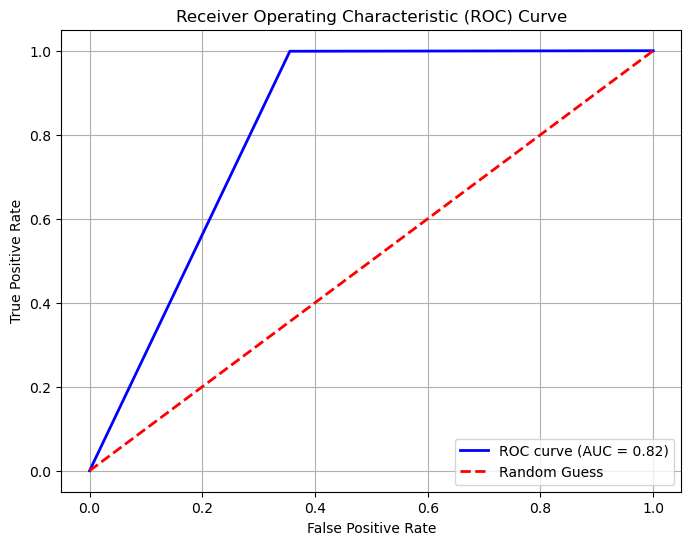

In [116]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_bin)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [117]:
#create a cross-tabulation of predicted and actual labels
result  = pd.crosstab(y_test_pred,
            y_test,
            margins = True)

In [118]:
result

Fraud_indicator,Fraud,Not Fraud,All
row_0,,,
Fraud,127,1,128
Not Fraud,70,802,872
All,197,803,1000


Based on the crosstabulation results above, there are 197 transactions predicted as fraud by the model. Of these, 127 transactions are actually fraud, while 70 transactions are predicted as fraud but are not. On the other hand, there are 803 transactions predicted as non-fraud by the model. Of these, 802 transactions are actually non-fraud, while only 1 transaction is actually fraud but predicted as non-fraud.

From the entire test data (1000 transactions), the model successfully identified 128 fraud transactions and 872 non-fraud transactions correctly. However, there were 71 misclassified transactions, of which 70 were false positives (non-fraud transactions incorrectly predicted as fraud) and 1 false negative (fraud transactions incorrectly predicted as non-fraud).